In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt

# Завантаження даних
file_path = '/content/final_df.csv'
data = pd.read_csv(file_path)

# Розділення даних на ознаки та мітки
X = data.drop('churn', axis=1)  # Ознаки
y = data['churn']  # Цільова змінна

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Гіперпараметри для крос-валідації
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
}

# Крос-валідація та навчання моделей
best_models = {}
history = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    history[model_name] = pd.DataFrame(grid_search.cv_results_)
    print(f"{model_name} best params: {grid_search.best_params_}")
    print(f"{model_name} best score: {grid_search.best_score_}")

# Оцінка моделей
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} Recall: {recall_score(y_test, y_pred)}")
    print(f"{model_name} Precision: {precision_score(y_test, y_pred)}")
    print(f"{model_name} F1 Score: {f1_score(y_test, y_pred)}")
    print(f"{model_name} Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

# Збереження моделей машинного навчання
for model_name, model in best_models.items():
    joblib.dump(model, f'{model_name.replace(" ", "_")}_model.pkl')
    print(f"{model_name} model saved as {model_name.replace(' ', '_')}_model.pkl")



Logistic Regression best params: {'C': 0.1}
Logistic Regression best score: 0.9338279238041233
Random Forest best params: {'max_depth': None, 'n_estimators': 100}
Random Forest best score: 0.9662740082730874
Decision Tree best params: {'max_depth': None, 'min_samples_split': 10}
Decision Tree best score: 0.9733651373060932
Logistic Regression Accuracy: 0.9344171566931857
Logistic Regression Recall: 0.9283664045925372
Logistic Regression Precision: 0.9521310636119288
Logistic Regression F1 Score: 0.9400985719701757
Logistic Regression Mean Squared Error: 0.06558284330681426
Random Forest Accuracy: 0.9667243168453822
Random Forest Recall: 0.97092225134157
Random Forest Precision: 0.9691081215744893
Random Forest F1 Score: 0.9700143382582133
Random Forest Mean Squared Error: 0.03327568315461778
Decision Tree Accuracy: 0.9743341404358353
Decision Tree Recall: 0.9755397479096468
Decision Tree Precision: 0.9781031031031031
Decision Tree F1 Score: 0.9768197438300531
Decision Tree Mean Squared

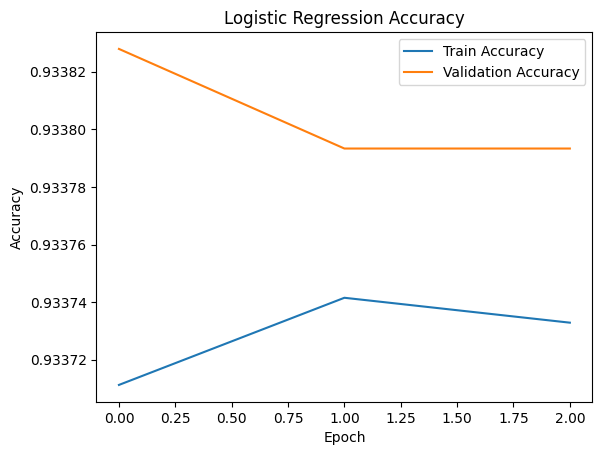

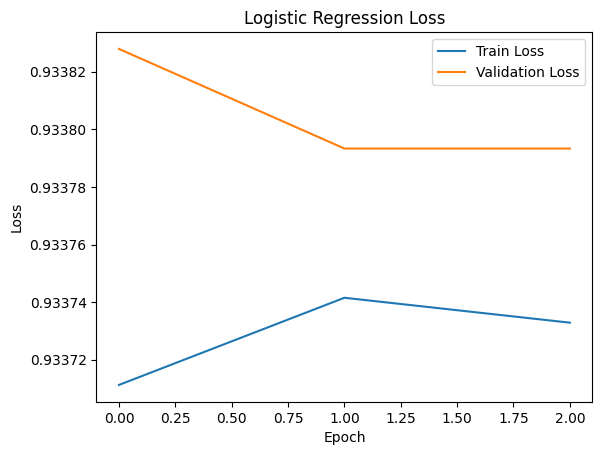

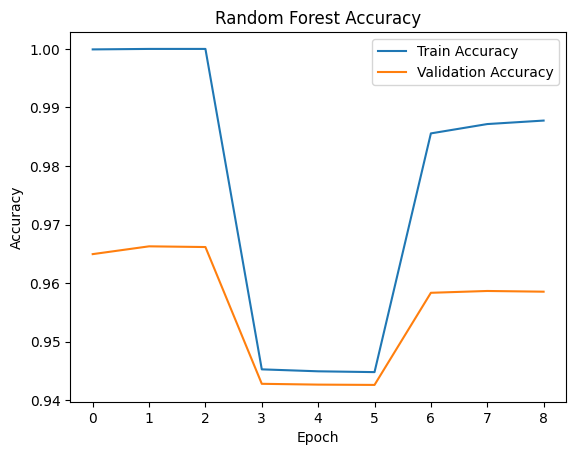

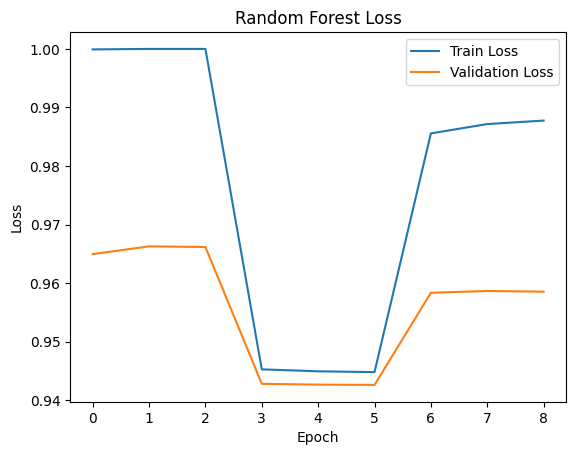

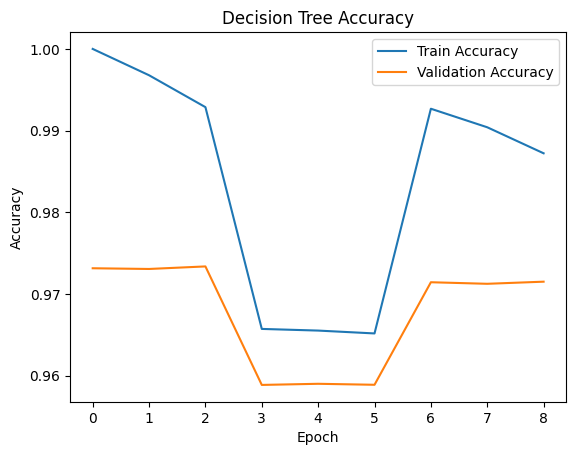

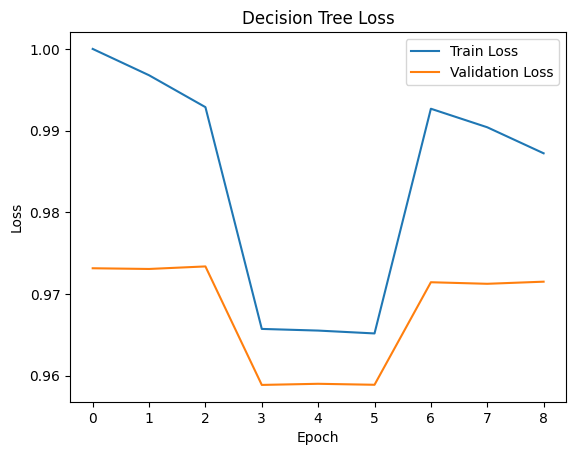

In [17]:
for model_name, hist in history.items():
    plt.plot(hist['mean_train_score'], label='Train Accuracy')
    plt.plot(hist['mean_test_score'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(hist['mean_train_score'], label='Train Loss')
    plt.plot(hist['mean_test_score'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Як ми бачимо найбільш погані результати показує Logistic Regression, проте все одно це дуже гарний результат. Дві інші моделі мають чудові метрики , що показує на їх правильне навчання